In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
class Dataset(object) :
    def __init__(self,filen) :
        self.filename = filen
        self.data = pd.read_csv(self.filename)
        self.datam = self.data.as_matrix()
        self.x = self.datam[:,[1]] 
        self.y = self.datam[:,[4]]
    def plot(self) :
        %matplotlib inline
        plt.scatter(self.x,self.y)
        plt.show()

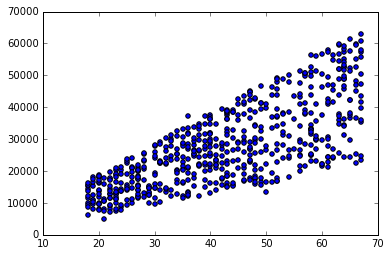

In [3]:
# x = Age  y = Income
datas = Dataset("bank-data.csv")
datas.plot()

In [4]:
class KMedioids(object) :
    def __init__(self,x,y,k=2) :
        self.k = k
        self.x = x
        self.y = y
        self.length = len(x)
    def compute_distance(self,x1,y1,x2,y2) :
        return sqrt((x1-x2)**2 + (y1 - y2)**2)
    def algorithm(self) :
        self.first_x,self.first_y = 33,17500.0
        self.second_x,self.second_y = 60,32000.0
        self.first_cluster = list()
        self.second_cluster = list()
        for idx in xrange(500) :
            del self.first_cluster[:]
            del self.second_cluster[:]
            for i in xrange(self.length) :
                distance1 = self.compute_distance(float(self.x[i]),float(self.y[i]),self.first_x,self.first_y)
                distance2 = self.compute_distance(float(self.x[i]),float(self.y[i]),self.second_x,self.second_y)
                if distance1 > distance2 :
                    self.first_cluster.append(i)
                else :
                    self.second_cluster.append(i)
            xlist = list()
            ylist = list()
            for i in  range(len(self.first_cluster)) :
                xlist.append(float(self.x[self.first_cluster[i]]))
                ylist.append(float(self.y[self.first_cluster[i]]))
            xsort = np.sort(np.array(xlist))
            ysort = np.sort(np.array(ylist))
            if (len(xsort) % 2 == 0) :
                self.first_x = xsort[int(len(xsort)/2)]
            else :
                self.first_x = xsort[int((len(xsort)-1)/2)]
            if (len(xsort) % 2 == 0) :
                self.first_y = ysort[int(len(ysort)/2)]
            else :
                self.first_y = ysort[int((len(ysort)-1)/2)]
            del xlist[:]
            del ylist[:]
            for i in  range(len(self.second_cluster)) :
                xlist.append(float(datas.x[self.second_cluster[i]]))
                ylist.append(float(datas.y[self.second_cluster[i]]))
            xsort = np.sort(np.array(xlist))
            ysort = np.sort(np.array(ylist))
            if (len(xsort) % 2 == 0) :
                self.second_x = xsort[int(len(xsort)/2)]
            else :
                self.second_x = xsort[int((len(xsort)-1)/2)]
            if (len(xsort) % 2 == 0) :
                self.second_y = ysort[int(len(ysort)/2)]
            else :
                self.second_y = ysort[int((len(ysort)-1)/2)]
            del xlist[:]
            del ylist[:]
        return np.array(self.first_cluster),np.array(self.second_cluster)

In [5]:
kmeans = KMedioids(datas.x,datas.y)
arr1,arr2 = kmeans.algorithm()

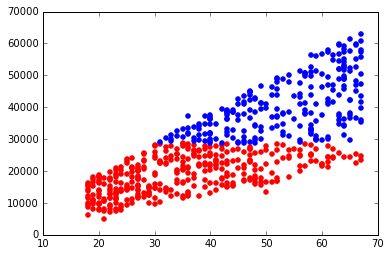

In [6]:
xlist = list()
ylist = list()
for i in  range(len(arr1)) :
    xlist.append(float(datas.x[arr1[i]]))
    ylist.append(float(datas.y[arr1[i]]))
#print len(xlist),len(ylist)
plt.scatter(np.array(xlist),np.array(ylist),color = 'red')
del xlist[:]
del ylist[:]
for i in  range(len(arr2)) :
    xlist.append(float(datas.x[arr2[i]]))
    ylist.append(float(datas.y[arr2[i]]))
plt.scatter(np.array(xlist),np.array(ylist),color = 'blue')
plt.show()